# MapExtrakt Usage

> First import your model

In [53]:
import torchvision
model = torchvision.models.vgg16(pretrained=True)

> Import MapExtract's Feature Extractor

In [ ]:
from MapExtrakt import FeatureExtractor

fe = FeatureExtractor(model)


### Set image to be analysed - input can be PIL Image, Numpy array or filepath. We are using the path

In [ ]:
fe.set_image("cat.jpg")

### Total number or layers available can be viewed

In [ ]:
fe.layers

### Along with total cells per layer

In [51]:
fe.get_cells(layer_no=10)

511

### Total cells over all layers

In [ ]:
fe.get_total_cells()


# Displaying Maps

### Basic layer maps

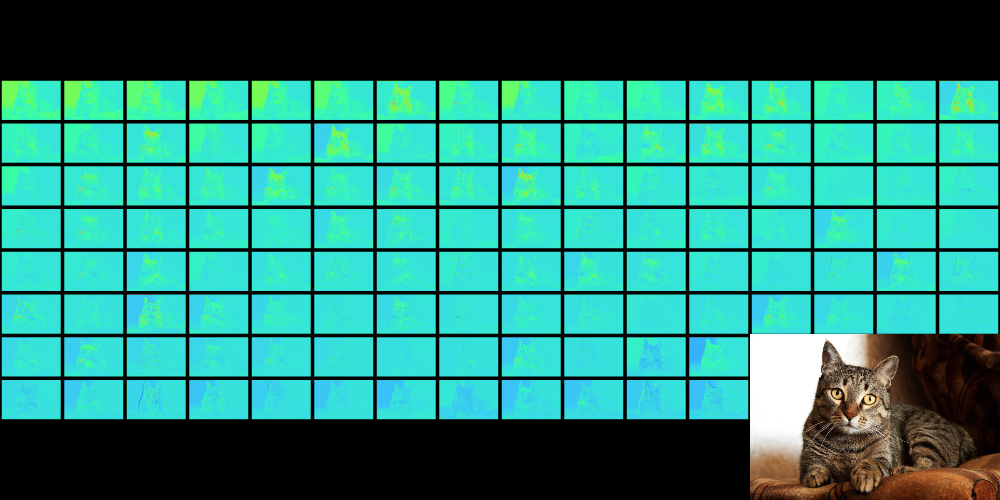

In [18]:
img = fe.display_from_map(layer_no=2, out_type="pil", colourize=20, outsize=(1000,500), border=0.03, picture_in_picture=True)
img

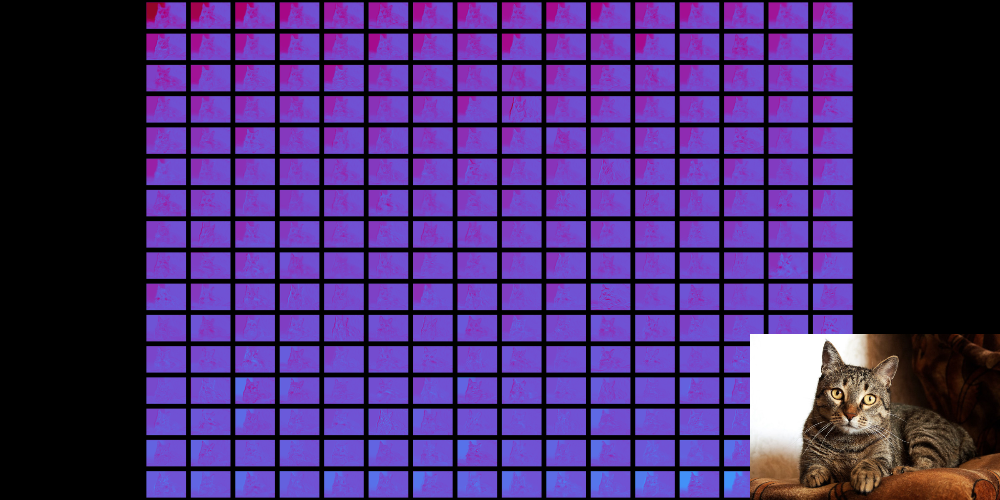

In [23]:
img = fe.display_from_map(layer_no=5, out_type="pil", colourize=15, outsize=(1000,500), border=0.06, picture_in_picture=True)
img

### Individual cell maps

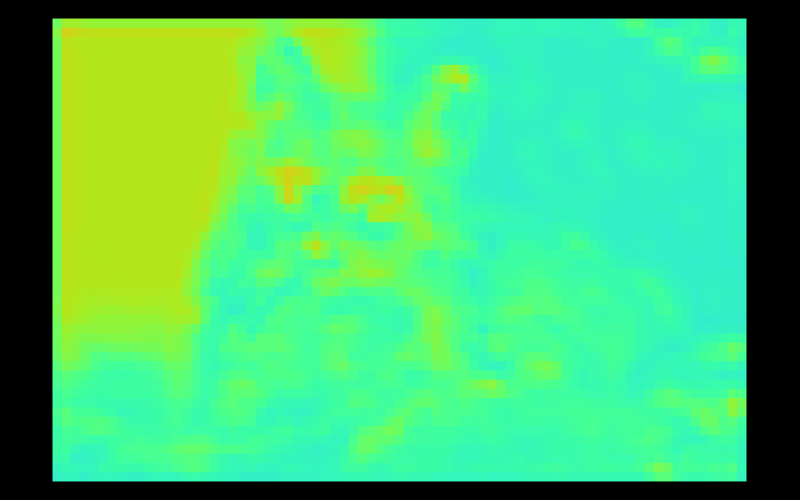

In [22]:
img = fe.display_from_map(layer_no=8, cell_no=20, out_type="pil", colourize=20, outsize=(800,500), border=0.03, picture_in_picture=False)
img

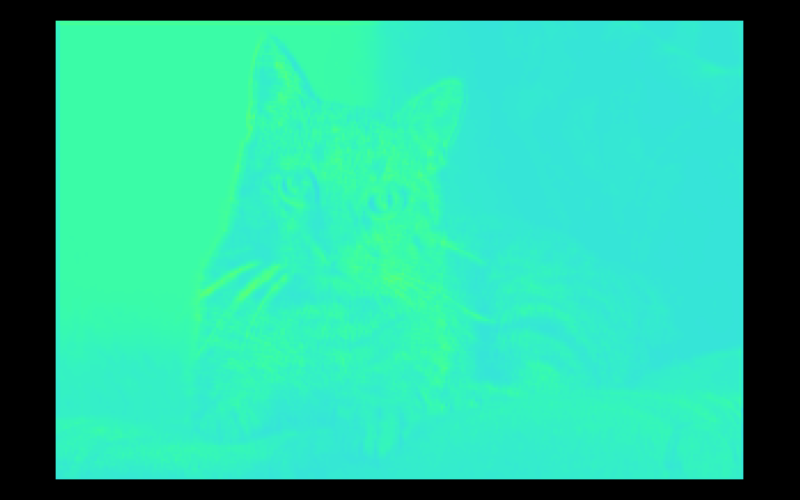

In [21]:
img = fe.display_from_map(layer_no=2, cell_no=10, out_type="pil", colourize=20, outsize=(800,500), border=0.03, picture_in_picture=False)
img

### Setting a new image

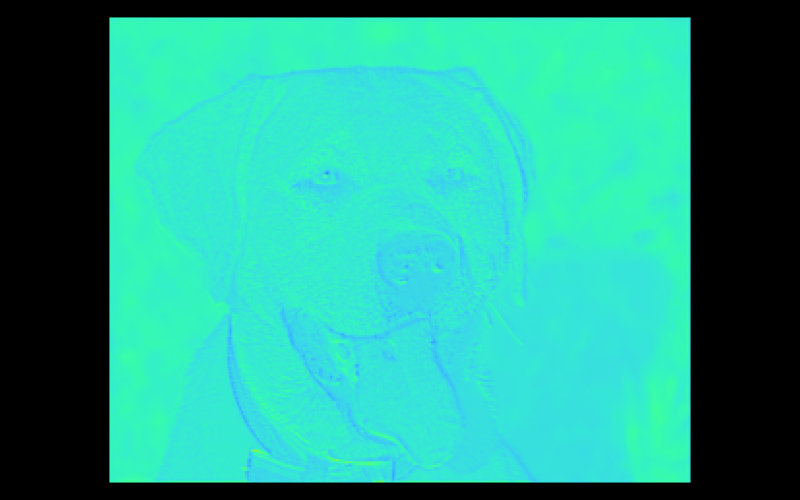

In [24]:
fe.set_image("dog.jpg")
img = fe.display_from_map(layer_no=2, cell_no=10, out_type="pil", colourize=20, outsize=(800,500), border=0.03, picture_in_picture=False)
img

### Changing border and displaying with maps relative size (no size specified) and new colourize style

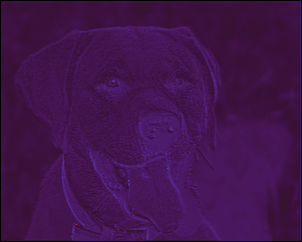

In [31]:
img = fe.display_from_map(layer_no=2, cell_no=10, out_type="pil", colourize=18, border=0.00, picture_in_picture=False)
img

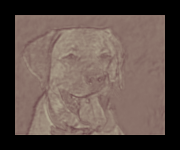

In [42]:
img = fe.display_from_map(layer_no=6, cell_no=250, out_type="pil", colourize=1, border=0.1, picture_in_picture=False)
img

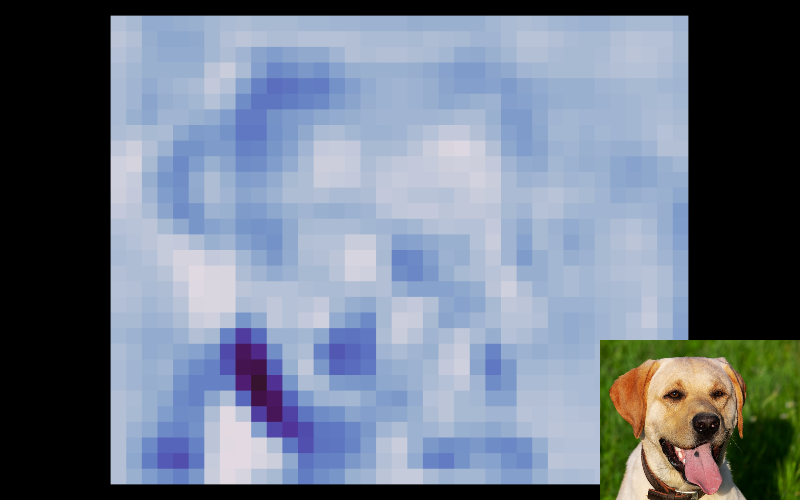

In [50]:
img = fe.display_from_map(layer_no=11, cell_no=500, out_type="pil", colourize=19, outsize=(800,500), border=0.02, picture_in_picture=True)
img

### Writing to video

In [29]:
fe.write_video(out_size=(800,500), file_name="output1.mp4", colourize=20,
               border=0.03, fps=60, frames_per_cell=1, fade_frames_between_cells=6,
               write_text=True, picture_in_picture=True)

3189 /3189   Total Time Taken 0:03:18    Time Left 0:00:00    [==============================] 100.0 %  
Video saved as output1.mp4


In [34]:
%%HTML
<video width="320" height="240" controls>
  <source src="./output1.mp4" type="video/mp4">
</video>

